In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import graphviz

_Імпортуємо данні з бібліотеки_

In [246]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

_Визначаємо предиктори та шукомі величини, та одразу розбиваємо на тренувальну та тестову вибірку у розмірі 75-25_

In [247]:
X, y  = iris.data, iris.target 

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

_Створюємо та навчаємо модель. Для пошуку гіперпараметрів використовував RandomizedSearchCV. Знайшовши оптимальні параметри прописав вручну в моделі, оскільки  подалі при побудові дерева graphviz не приймає клас RandomizedSearchCV._

In [250]:
model = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features= 'sqrt',max_depth=None )

In [251]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_features='sqrt')

_Робимо предикцію та вираховуємо метрики зокрема точність моделі, що становить 1.0_

In [252]:
y_pred = model.predict(X_test)

In [253]:
metrics.accuracy_score(y_test, y_pred)

1.0

_Будуємо дерево прийняття рішень за допомогою graphviz. "target" та "feature_names" взяв з документції до датасету_

In [254]:
target = ['setosa', 'versicolor', 'virginica']
feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [255]:
dot_data = tree.export_graphviz(model,feature_names=feature_names,class_names=target)  
graph = graphviz.Source(dot_data)

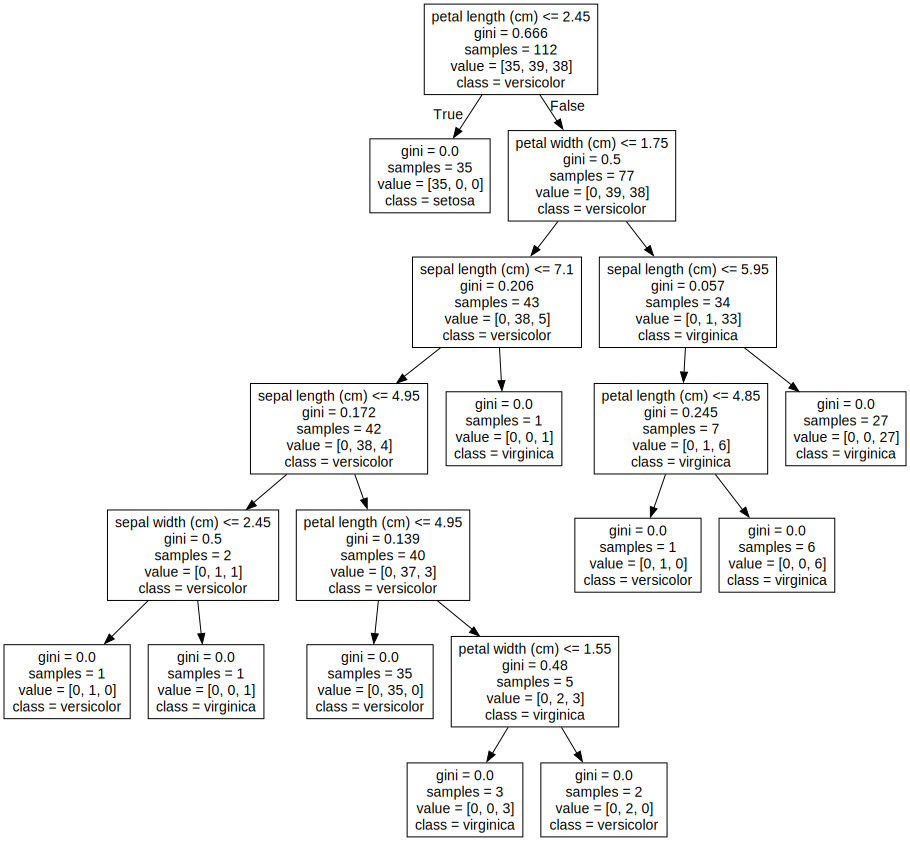

In [256]:
graph

_Обраховуємо значимість параметрів, та будуємо таблицю для кращої візуалізації._

In [257]:
importances = model.feature_importances_
importances

array([0.03370591, 0.01340675, 0.5491414 , 0.40374593])

In [267]:
sorted_importances = pd.DataFrame({'feature': feature_names,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
sorted_importances

,feature,importance
2,petal length (cm),0.549141
3,petal width (cm),0.403746
0,sepal length (cm),0.033706
1,sepal width (cm),0.013407
